In [ ]:
## Image recognition Using CNN

In [ ]:
###import data set

In [ ]:
from tensorflow import keras
from keras.datasets import mnist

(x_train_full, y_train_full), (x_test, y_test)= mnist.load_data()

In [ ]:
print('Shape of training dataset', x_train_full.shape)
print('Shape of training dataset', x_test.shape)

Shape of training dataset (60000, 28, 28)
Shape of training dataset (10000, 28, 28)


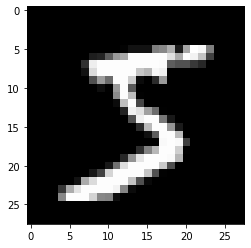

5


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train_full[0], cmap = 'gray')
plt.show()
print(y_train_full[100])

In [ ]:
###split full training datasets to training validation

X_valid, X_train = x_train_full [:5000]/ 255, x_train_full[5000:]/255
Y_valid, Y_train = y_train_full [:5000], y_train_full[5000:]

print('Shape of training dataset', X_train.shape)
print('Shape of training dataset', X_valid.shape)
print('Shape of training dataset', Y_train.shape)
print('Shape of training dataset', Y_valid.shape)

Shape of training dataset (55000, 28, 28)
Shape of training dataset (5000, 28, 28)
Shape of training dataset (55000,)
Shape of training dataset (5000,)


In [ ]:
##Convert Image to 3D Tensor
#X_train -> (55000, 28, 28) -> (55000, 28, 28, 1)
#X_train -> (55000, 28, 28) -> (55000, 28, 28, 1)
#X_train -> (55000, 28, 28) -> (55000, 28, 28, 1)

X_train =  X_train.reshape([X_train.shape[0], 28, 28,1])
X_valid =  X_valid.reshape([X_valid.shape[0], 28, 28,1])
x_test =  x_test.reshape([x_test.shape[0], 28, 28,1])

print('Shape of training dataset', X_train.shape)
print('Shape of training dataset', X_valid.shape)
print('Shape of training dataset', x_test.shape)

Shape of training dataset (55000, 28, 28, 1)
Shape of training dataset (5000, 28, 28, 1)
Shape of training dataset (10000, 28, 28, 1)


In [ ]:
### Desain CNN Architecture
#1. keras.squential()
#2. keras.Model()

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D



In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.backend import dropout
import keras
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='ELU', input_shape= (28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size= (2,2), strides= (2,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(257, activation= 'ELU'))
model.add(Dense(128, activation= 'ELU'))
model.add(Dense(10, activation= 'softmax'))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 27, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, 14, 27, 32)       128       
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 12096)             0         
                                                                 
 dense_8 (Dense)             (None, 257)               3108929   
                                                                 
 dense_9 (Dense)             (None, 128)             

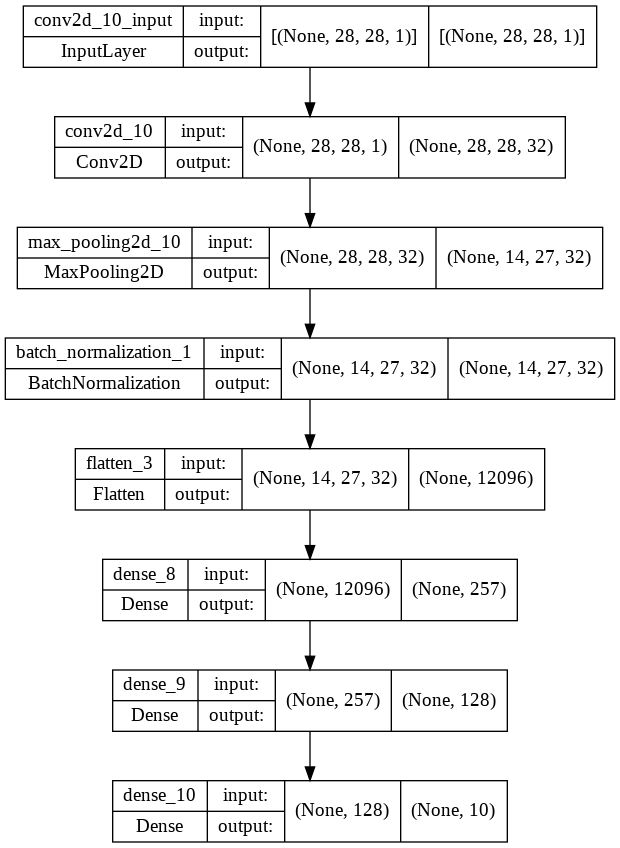

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True, show_layer_names=True)


In [ ]:
### Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam', metrics= ['accuracy'])

In [ ]:
histroy= model.fit(X_train, Y_train, epochs = 20, validation_data=(X_valid,Y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2059 - accuracy: 0.9450 - val_loss: 0.2094 - val_accuracy: 0.9408
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.2048 - val_accuracy: 0.9478
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0589 - accuracy: 0.9821 - val_loss: 0.1076 - val_accuracy: 0.9718
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9867 - val_loss: 0.1411 - val_accuracy: 0.9630
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.1168 - val_accuracy: 0.9744
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.0869 - val_accuracy: 0.9836
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0255 - accuracy: 0.9925 - val_loss: 0.1696 - val_accuracy:

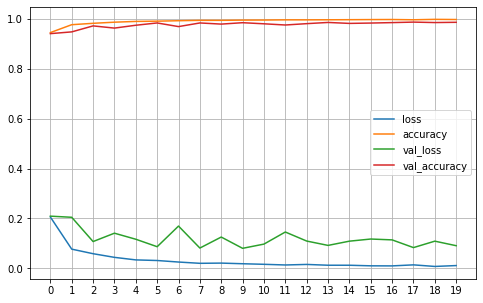

In [ ]:
### Drav the Learning Curve

import pandas as pd
import numpy as np

pd.DataFrame(histroy.history).plot(figsize=(8,5))
plt.grid(True)
plt.xticks(np.arange(0,20))
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 90.1289 - accuracy: 0.9699


In [ ]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis = 1)

cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 950    0    8    0    1    2   10    9    0    0]
 [   2 1090   14    4    2    2    4    7   10    0]
 [   0    0 1029    1    0    0    0    2    0    0]
 [   0    0    3  998    0    8    0    1    0    0]
 [   0    1   16    0  954    2    0    0    2    7]
 [   0    0    0    6    0  883    3    0    0    0]
 [   0    2    5    1    1   13  934    0    2    0]
 [   0    1   19    3    0    1    0 1004    0    0]
 [   3    1   16    6    0   42    2    1  898    5]
 [   1    0   12    5    5   21    0    5    1  959]]


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       1.00      0.96      0.98      1135
           2       0.92      1.00      0.96      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.91      0.99      0.95       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.92      0.95       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

